# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import CV_Datas,EC_Data,CV_Data
from ec4py import AREA,LEGEND,RHE
from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV" / "MWE" / "Capacitance"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
# paths.append( path_to_dataSetFolder / "CV_135307_ 3_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_140548_ 9_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_142109_ 8_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123313_ 1_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123317_ 1_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123330_ 1_MI.tdms")




c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\Capacitance


## 3. Load in the data files

In [3]:
a =EC_Data(paths[0])
a.setup


{'Current Range': '10mA',
 'Control Mode': 'WE',
 'Cell Switch': 'TRUE',
 'Start': '0.500 V',
 'Start_Delay': '0.000 s',
 'V1': '1.500 V',
 'V2': '1.200 V',
 'Rate': '0.500 V/s',
 'Nr of Sweeps': '1.00',
 'Method.Duration': '1.2',
 'Method.Cycle Duration': '1.2',
 'Method.Avg.Time': '0.004',
 'AC Frequency': '5.000E+3 Hz',
 'AC Amplitude': '0.0150 V',
 'RHE': '-0.834 V',
 'Gas': 'None',
 'Temp_0': '298.15 K',
 'Temp_1': '298.15 K',
 'Pressure': '100000 Pa',
 'Cell Material': 'Acrylic',
 'CounterElectrode': 'GC',
 'Ref.Electrode': 'Ag/AgCl',
 'R.solution': '-1.00 Ohm',
 'IR.compensation': '-1.00 Ohm',
 'Electrolyte1': '1.0 M_NaOH: H2O_20 ml',
 'Electrode.Material': '',
 'Electrode.Tip': '',
 'Electrode.Area': '1.96E-5 m^2',
 'Electrode.ExElectrode': '',
 'Electrode.Cat.Loading': '0.00E+0 g m^-2',
 'Electrode.Cat.Weight': '0.00E+0 g',
 'Electrode.Cat.totWeight': '0.00E+0 g',
 'Electrode.Cat.w%': '0.00',
 'Electrode.Cat.Serial': '',
 'Electrode.Cat.Batch': '',
 'Electrode.Cat.Support': ''

In [4]:
a.channels

['Time',
 'E',
 'i_0',
 'i_1',
 'i_2',
 'i_3',
 'i_4',
 'i_5',
 'i_6',
 'i_7',
 'Z_0',
 'Z_1',
 'Z_2',
 'Z_3',
 'Z_4',
 'Z_5',
 'Z_6',
 'Z_7',
 'Phase_0',
 'Phase_1',
 'Phase_2',
 'Phase_3',
 'Phase_4',
 'Phase_5',
 'Phase_6',
 'Phase_7']

(<matplotlib.lines.Line2D at 0x207e46a6fd0>,
 <Axes: xlabel='E (V)', ylabel='Current (A)'>)

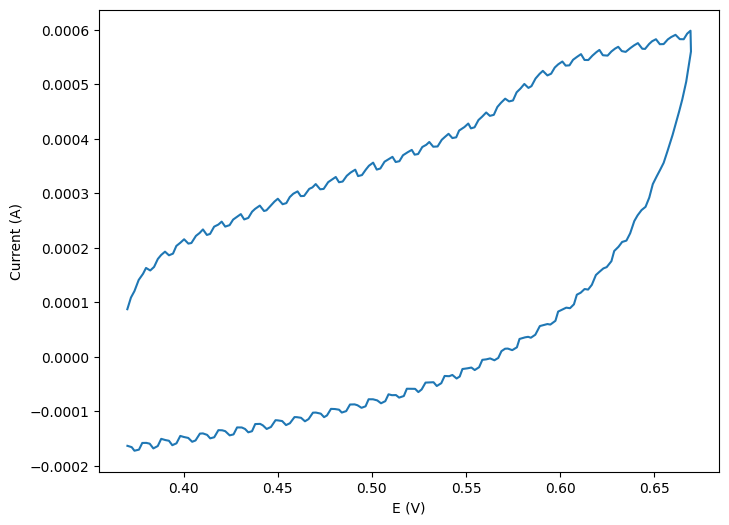

In [5]:
EC_Data(paths[0]).plot("E","i_4")

In [6]:
a=CV_Data(paths[0],"i_2")

In [7]:
a=CV_Datas(paths,"i_2")
a.rate
a[0].set_mass(1.3,"g")
a[1].set_mass(1.3,"g")
a[2].set_mass(1.3,"g")
print(a.loading)
#a[0].plot(RHE,LOADING,LEGEND,color="yellow",grid=True)
a.plot(RHE,LOADING,LEGEND.RATE,color=["yellow","blue","red"],label=["12","22","32","3333"],linewidth=[0.00,5,2], linestyle =[":","o",":"], grid=True)

[L = 6.633e+04 g m^-2, L = 6.633e+04 g m^-2, L = 6.633e+04 g m^-2]


<Axes: xlabel='E vs RHE (V)', ylabel='i L$^{-1}$ (A g$^{-1}$ m$^{2}$)'>

Error in callback <function _draw_all_if_interactive at 0x00000207D25F5A80> (for post_execute), with arguments args (),kwargs {}:


ValueError: At least one value in the dash list must be positive

ValueError: At least one value in the dash list must be positive

<Figure size 800x600 with 1 Axes>

In [8]:

a[1].get_i_at_E(0.5)



[i$_{+}$ = 2.040e-04 A, i$_{-}$ = -1.126e-04 A]

In [9]:
a.get_i_at_E(1.3,"BB","RHE",RHE)
tuple()


()

<Axes: xlabel='E vs Ag/AgCl (V)', ylabel='i A$^{-1}$ (A m$^{-2}$)'>

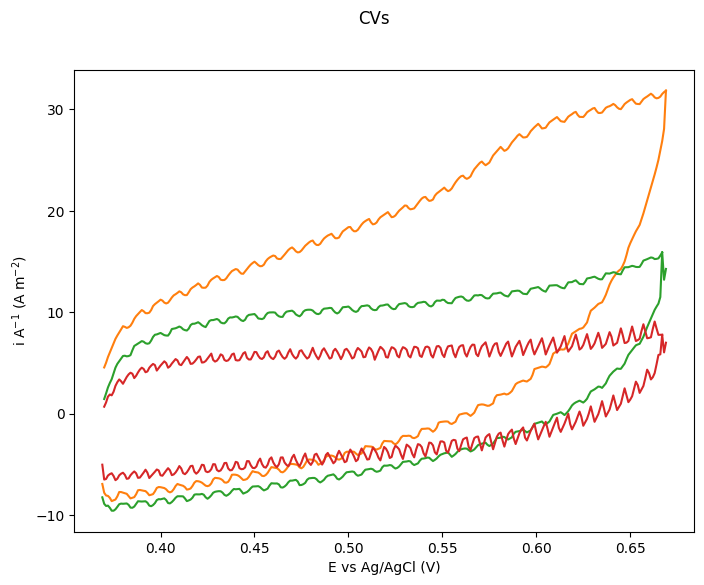

In [10]:
a.plot(AREA)

ValueError: too many values to unpack (expected 2)

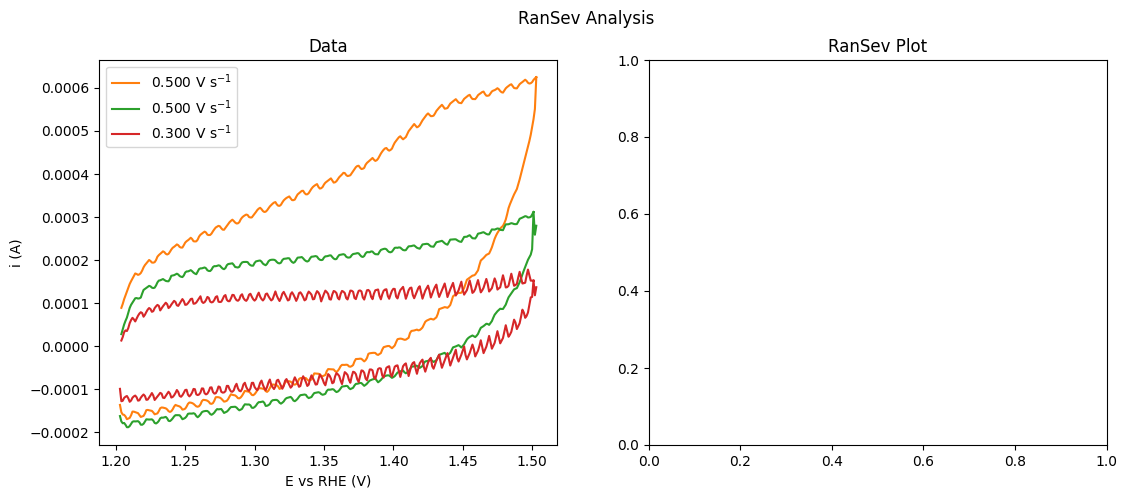

In [11]:
a.RanSev(1.3,RHE)

In [ ]:
CVs = CV_Datas(paths)
for cv in CVs:
    #cv.set_area(0.04532, "cm^2")
    cv.get_E_at_i
    print("aa", cv.area)

In [ ]:
CVs[1].plot(4,title = "aa")

In [ ]:
#plot = CVs.plot("" ,legend = "name", smooth_y=50)
CVs[1].plot(title = "aa")
for cv in CVs[:1]:
    print(cv.rate)
    cv2 = cv * (1 / 1000.)
    #cv2.plot()

#CVs.bg_corr(CVs)
CVs.plot(AREA, LEGEND.NAME)
CVs[0].plot(AREA, LEGEND.RATE)
bg_corr = CVs.bg_corr(path_to_dataSetFolder / "CV_144913_ 3.tdms" )

#bg_corr.plot()

## 4. Levich analysis

In [ ]:
slope1, slope2 = CVs.Levich(-0.5,"area_cm", y_smooth = 11, )
#use the argument to normalize the data

## 5. Koutechy-Levich analysis

In [ ]:
slope1, slope2 = CVs.KouLev(-0.5,"area", y_smooth = 5)
print(slope1 ** 1, slope1 ** -1)
#use the argument to normalize the data

In [ ]:
CVs[0].Tafel([-0.2, -0.1 ],-0.5)

In [ ]:
CVs.Tafel([-0.2, -0.1 ],-0.5)


#use the argument to normalize the data

In [ ]:
CVs.Tafel([-0.2, -0.1 ],-0.5)